In [26]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import mutual_info_regression

In [27]:
# Access path
path_train_proteins = '/Kaggle/data/train_proteins.csv'
path_train_peptides = '/Kaggle/data/train_peptides.csv'
path_train_clinical_data = '/Kaggle/data/train_clinical_data.csv'

In [28]:
# Read CSV files from a DataFrame
protein_data = pd.read_csv(path_train_proteins)
peptide_data = pd.read_csv(path_train_peptides)
clinical_data = pd.read_csv(path_train_clinical_data)


# Exploratory data analysis (EDA) of the clinical dataset

---



In [29]:
print(f"dimension of the cilinical data :",clinical_data.shape)
print(f"dimension of the proteine data :",protein_data.shape)
print(f"dimension of the peptide data :",peptide_data.shape)

dimension of the cilinical data : (2615, 8)
dimension of the proteine data : (232741, 5)
dimension of the peptide data : (981834, 6)


In [30]:
# Use the describe method for UPDRS columns
stats = clinical_data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].describe()

print(stats)

# For the column 'upd23b_clinical_state_on_medication', we might be interested in value counts
medication_counts = clinical_data['upd23b_clinical_state_on_medication'].value_counts(dropna=False)
print(medication_counts)

           updrs_1     updrs_2      updrs_3      updrs_4
count  2614.000000  2613.00000  2590.000000  1577.000000
mean      7.110559     6.74359    19.421236     1.861763
std       5.525955     6.32323    15.000289     3.022112
min       0.000000     0.00000     0.000000     0.000000
25%       3.000000     1.00000     6.000000     0.000000
50%       6.000000     5.00000    19.000000     0.000000
75%      10.000000    10.00000    29.000000     3.000000
max      33.000000    40.00000    86.000000    20.000000
NaN    1327
On      775
Off     513
Name: upd23b_clinical_state_on_medication, dtype: int64


<ipython-input-31-3c5b28a33cec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clinical_data.corr()


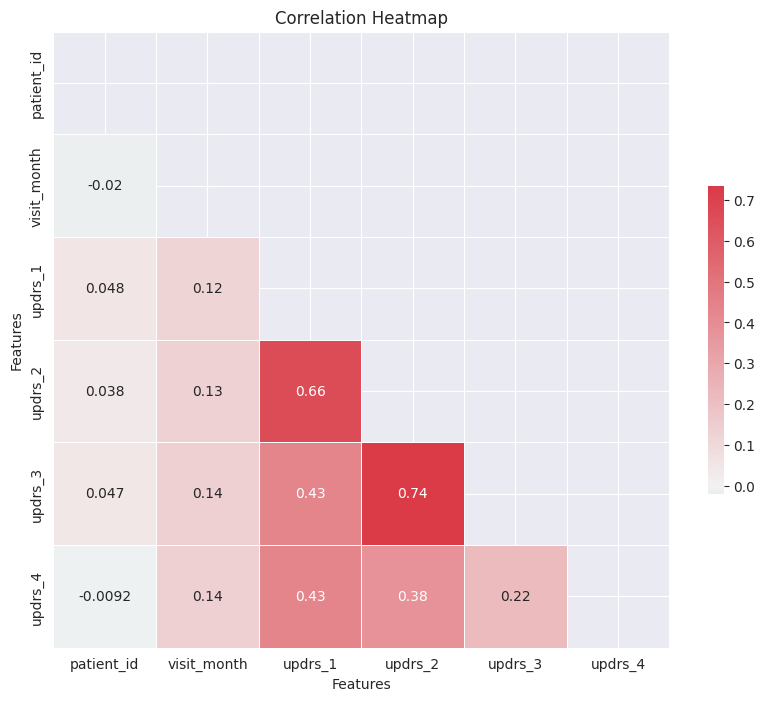

In [31]:
#Compute the correlation matrix
corr = clinical_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot=True)

# Add title and axis labels
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")

# Show the plot
plt.show()

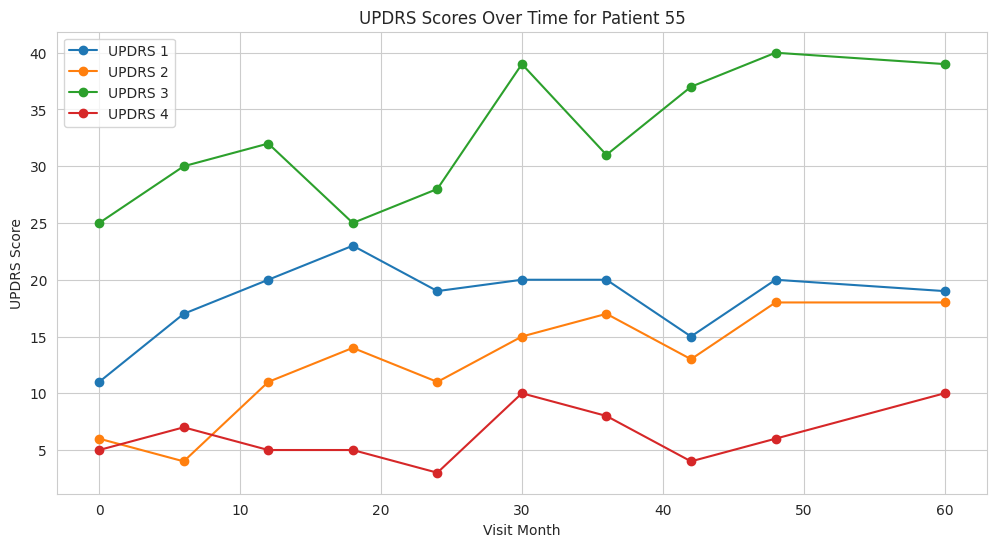

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Time series plot for a specific patient (e.g., patient 1517)
patient_data = clinical_data[clinical_data['patient_id'] == 1517]

plt.figure(figsize=(12,6))
plt.plot(patient_data['visit_month'], patient_data['updrs_1'], marker='o', label='UPDRS 1')
plt.plot(patient_data['visit_month'], patient_data['updrs_2'], marker='o', label='UPDRS 2')
plt.plot(patient_data['visit_month'], patient_data['updrs_3'], marker='o', label='UPDRS 3')
plt.plot(patient_data['visit_month'], patient_data['updrs_4'], marker='o', label='UPDRS 4')

plt.title('UPDRS Scores Over Time for Patient 55')
plt.xlabel('Visit Month')
plt.ylabel('UPDRS Score')
plt.legend()
plt.show()


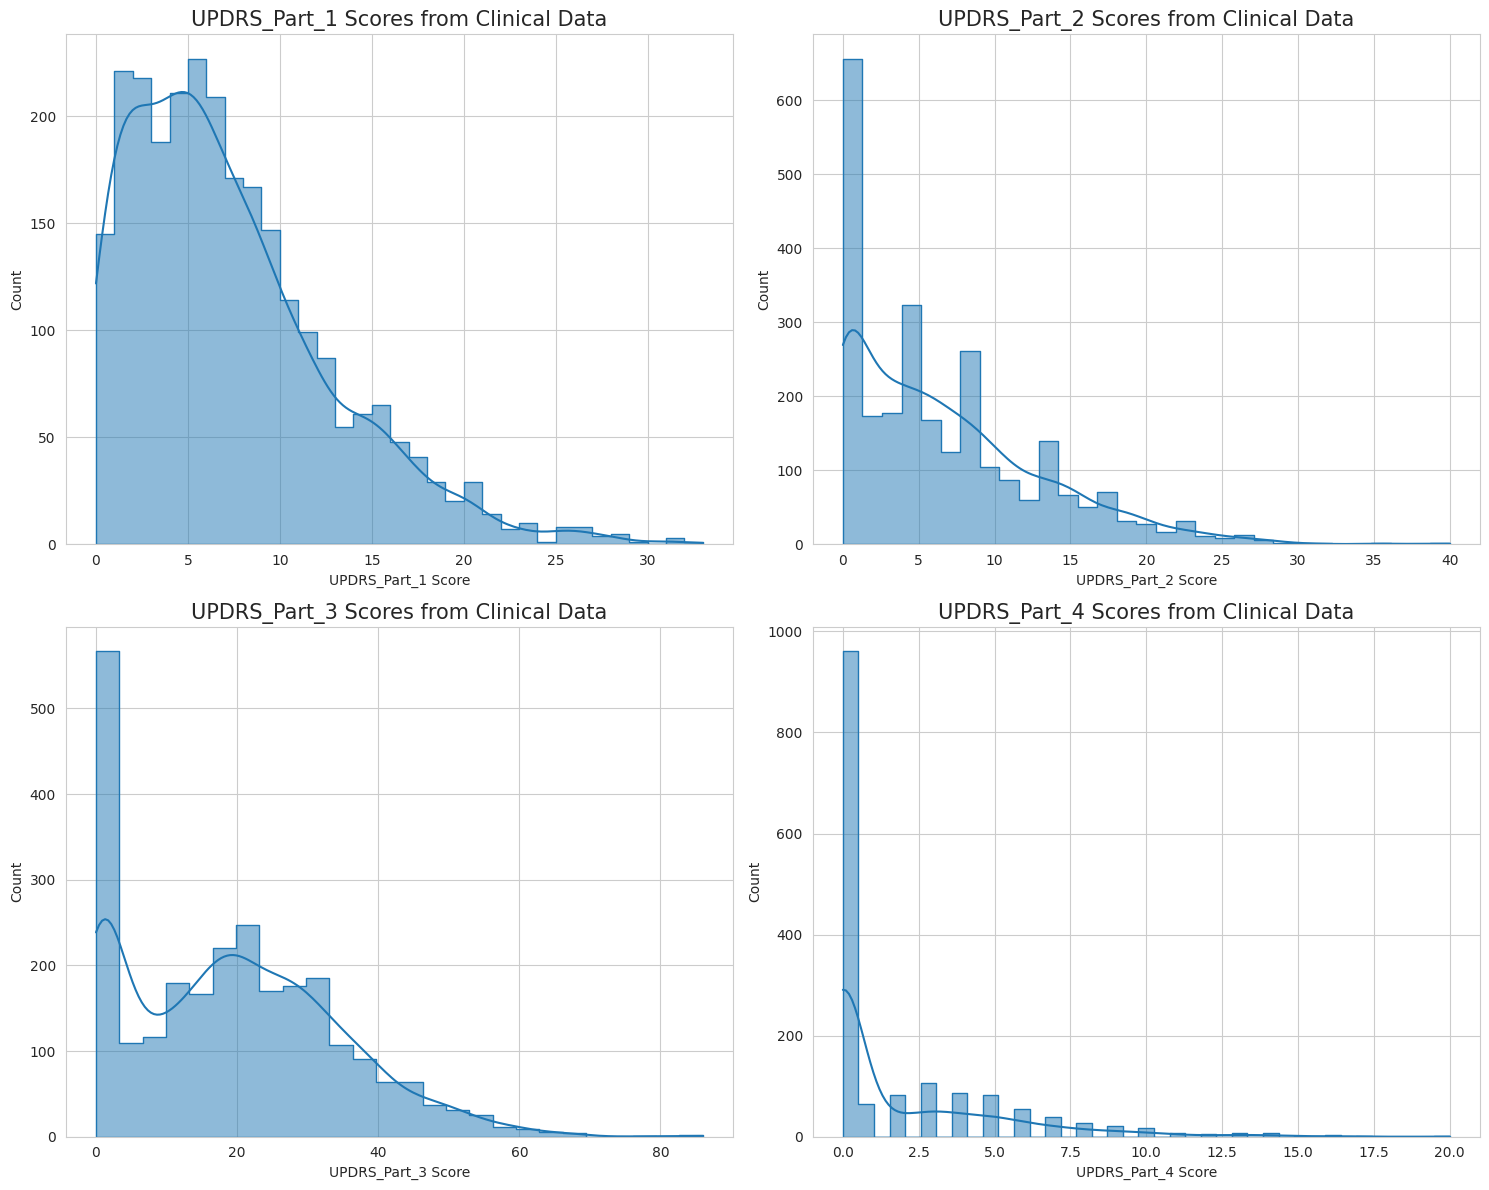

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

features = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
labels = ["UPDRS_Part_1", "UPDRS_Part_2", "UPDRS_Part_3", "UPDRS_Part_4"]

# Figure avec une matrice 2x2 de sous-graphiques
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.set_style('darkgrid')

# Parcourir les features
for x, feature in enumerate(features):
    row = x // 2
    col = x % 2
    ax = axs[row, col]
    sns.histplot(data=clinical_data, x=feature, kde=True, ax=ax, element="step")
    ax.set_title("{} Scores from Clinical Data".format(labels[x]), fontsize=15)
    ax.set_ylabel("Count")
    ax.set_xlabel("{} Score".format(labels[x]))

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


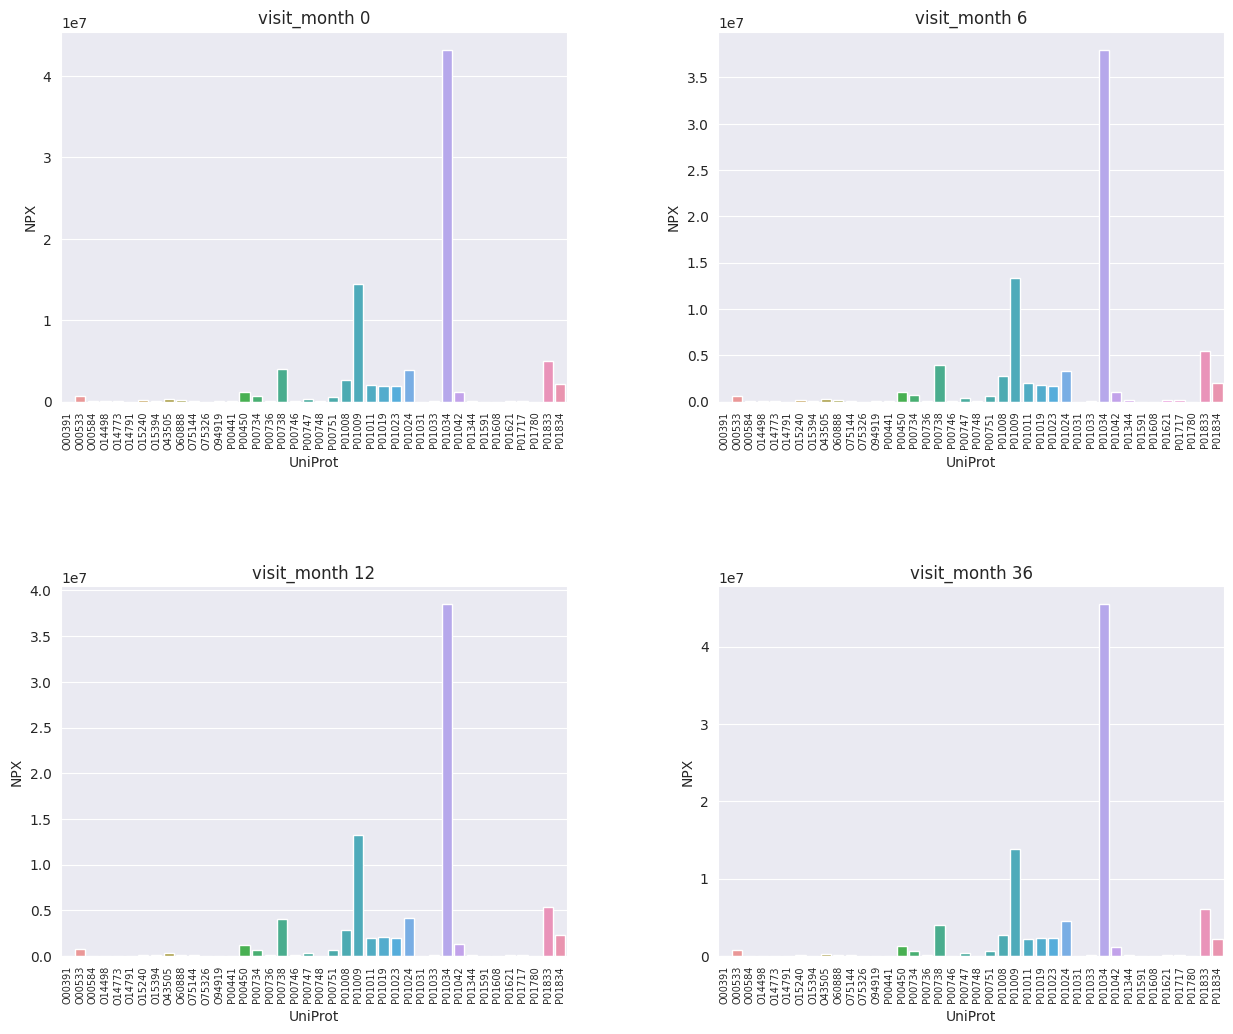

In [34]:
# We will pick a random patient_id and plot the first 40 Protein entries(UniProt)
# of the patient and their NPX value against patient's visit month(visit_month).
# histogramme des score UPDRS en fonction des patients

pro_plot_df = protein_data[protein_data["patient_id"]==55] #1517
protein_list = pro_plot_df['UniProt'].unique()

protein_list = protein_list[:40]
pro_plot_df = pro_plot_df[pro_plot_df['UniProt'].isin(protein_list)]
unique_month = pro_plot_df['visit_month'].unique()
unique_month.sort()
p_len = len(unique_month)

pro_plot_df['visit_month'].unique()
n_rows = math.ceil(p_len/2)
figure, axis = plt.subplots(n_rows, 2, figsize=(15, n_rows*6))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, month in enumerate(unique_month):
    row = i//2
    col = i % 2
    plot_df = pro_plot_df[pro_plot_df['visit_month']==month]
    bp = sns.barplot(ax=axis[row, col], x=plot_df['UniProt'], y=plot_df['NPX'])
    #bp.set(xticklabels=[])
    bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
    axis[row, col].set_title('visit_month ' + str(month))
plt.show()